<a href="https://colab.research.google.com/github/2unnifemi/portfolio/blob/main/Machine%20Learning%20Model%20for%20Income%20Prediction%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Name: Oyadiran Ayodeji

<br>

## Please show and display ALL your calculations and results.
> Remember to read the **`instructions`** carefully.

In [ ]:
# Built-in library
import itertools

# Standard imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from typing import Union
import matplotlib.pyplot  as plt
import seaborn as sns


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
#%load_ext lab_black

> The data can be found [here](https://drive.google.com/file/d/1_c3KA14xQC02K0QZ4cpi1emjdz0rqHzb/view?usp=share_link).

### Data Dictionary

```
- Age: continuous.

- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- Final_weight: continuous.

- Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- Education_num: continuous.

- Marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, - Married-AF-spouse.

- Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- Genger: Female, Male.

- Capital_gain: continuous.

- Capital_loss: continuous.

- Hours_per_week: continuous.

- Country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- Salary:
```

### Objective

```
Predict whether a person makes over 50K a year.

```



###  Qs 1. Build a machine learning model that predicts the salary.

###  Qs 2. Evaluate the performance of your model using at least three (3) performance metrics.

<hr>

## Note:

- The assignment **should** be submitted through a `public` GitHub repository.

## Importing the data

In [ ]:
df=pd.read_csv("salary.csv")
df.head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


##### Salary Dataset
Let's start by examining the structure and contents of the  dataframe:

In [ ]:
df.describe()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Basic information about the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Final_weight    32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Country         32560 non-null  object
 14  Salary          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Shows the information of the data. There is no null value in this data with 15 colums, 9 Object columns and 6 Numerical columns

In [ ]:
# copying the data to protect the main data
data = df.copy()
data.head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
# Renaming the target variable
data = data.rename(columns={"Salary":"Result"})
data.isna().sum()

Age               0
Workclass         0
Final_weight      0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Country           0
Result            0
dtype: int64

In [ ]:
#Splitting the dataset into numrical and categorical variables
num = data.select_dtypes(exclude="O")
categorical = data.select_dtypes(include="O")
num.shape,categorical.shape

((32560, 6), (32560, 9))

In [ ]:
num.head()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


### Exploratory Data Analysis
Categorical Variables

In [ ]:
categorical.head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Country,Result
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


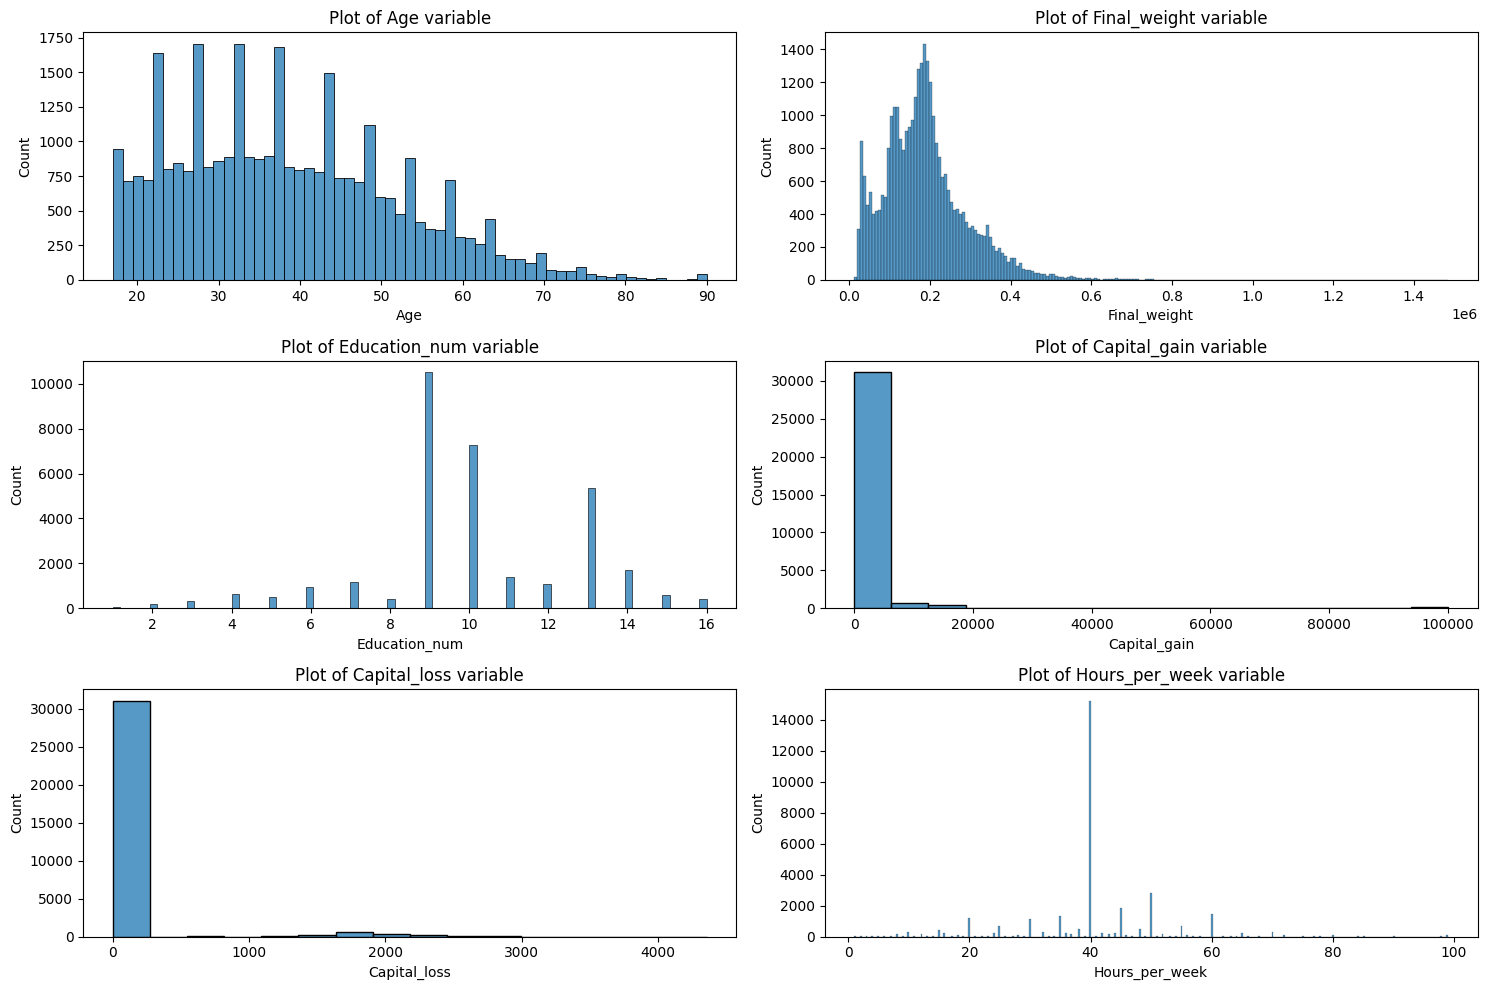

In [ ]:
# if the unqiue values is greater than the thresh then it's contineous and plot histplot.. this is just for the numerical
n_rows, n_cols = 3, 2
THRESH = 8

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 10))

for idx, feat in enumerate(num.columns):
    if n_rows > 1:
        ax = axs[(idx // n_cols), (idx % n_cols)]
    else:
        ax = axs[idx]

    if len(data[feat].unique()) > THRESH:
        sns.histplot(data=data, x=feat, ax=ax)
    else:
        sns.countplot(data=data, x=feat, ax=ax)
    ax.set_title(f"Plot of {feat} variable")

fig.tight_layout()
plt.show()

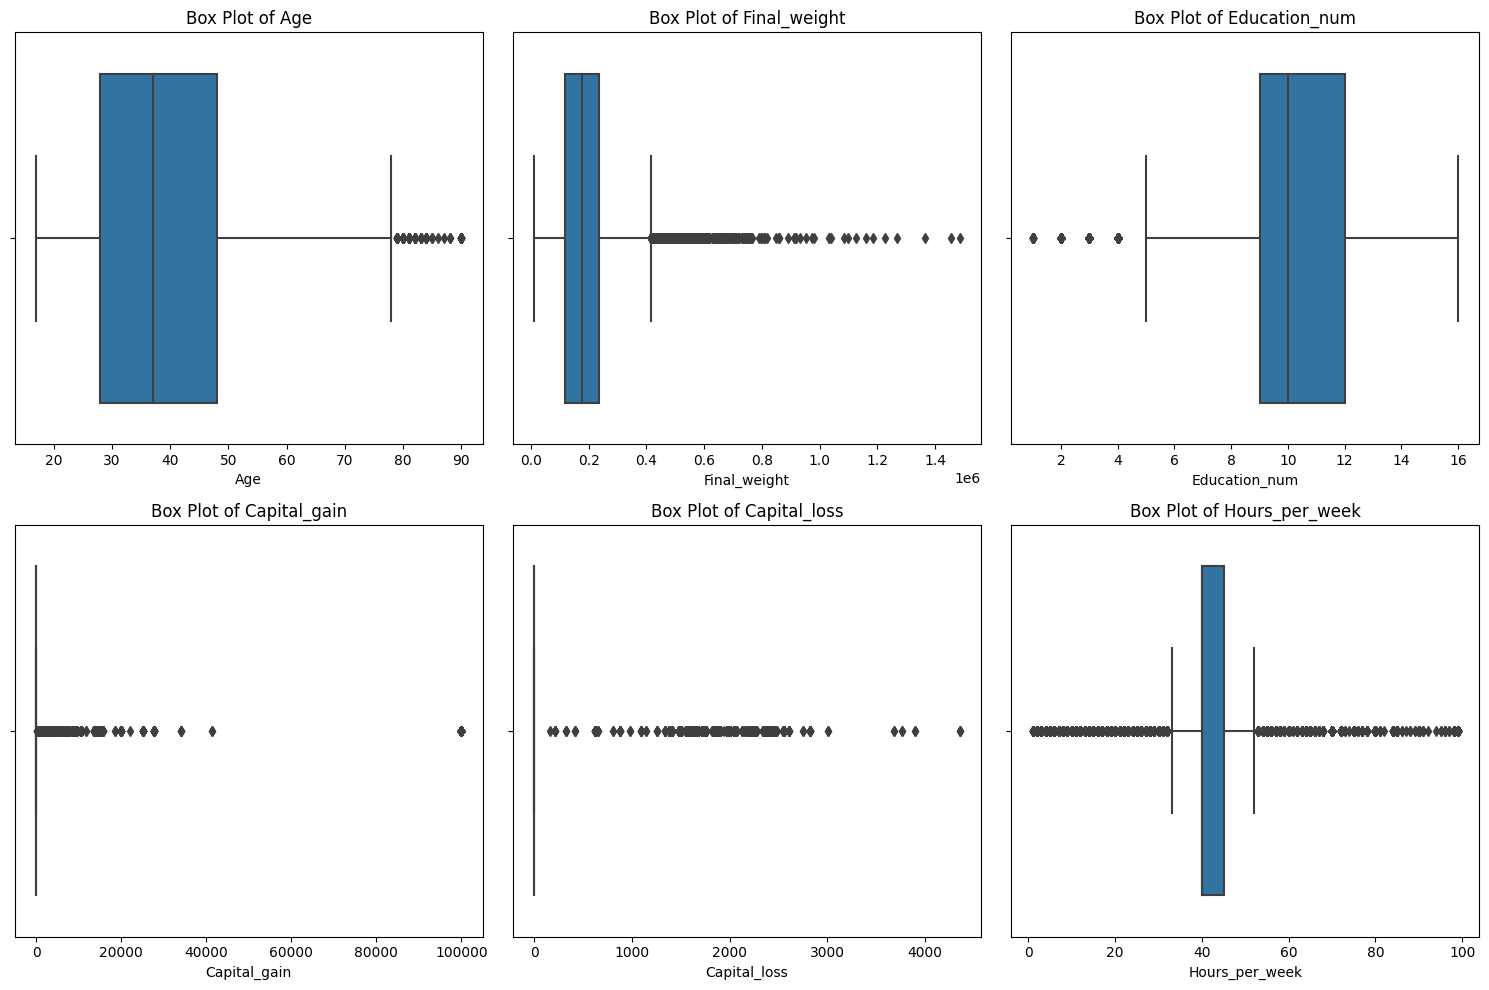

In [ ]:
n_rows, n_cols = 2, 3
THRESH = 10

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 10))

for idx, feat in enumerate(num.columns):
    if n_rows > 1:
        ax = axs[(idx // n_cols), (idx % n_cols)]
    else:
        ax = axs[idx]

    sns.boxplot(data=data, x=feat, ax=ax)
    ax.set_title(f"Box Plot of {feat}")

fig.tight_layout()
plt.show()

Box plot to see the outliers in our data and how they affect the each variable

## Dealing with Outliers
Here we would use Discretization process through which we can transform continuous variables, models or functions into a discrete form.

In [ ]:
def num_discritize(data:pd.DataFrame,feature:str,Bins:int,Labels:list[Union[int,str]]):
    """This discreatize the column to amount of desired bins"""
    data=data.copy()
    data[feature] = pd.qcut(x=data[feature],q=Bins,labels=Labels,duplicates="drop")

    return data[feature]

In [ ]:
feature = "Education_num"
Bins = 3
num_discritize(data=data,feature=feature,Bins=Bins,Labels=False)
data.head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Result
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
feat = "Capital_gain"
condalist =[(data[feat] == 0),(data[feat] > 0)]
choicelist = ["No gain","Gain"]
data[feat]=np.select(condlist=condalist,choicelist=choicelist)
data[feat].value_counts()

No gain    29849
Gain        2711
Name: Capital_gain, dtype: int64

In [ ]:
feat ="Education_num"
data[feat] = pd.qcut(x=data[feat],q=3,labels=False,duplicates="drop")
data[feat].value_counts()

0    14754
2    10515
1     7291
Name: Education_num, dtype: int64

In [ ]:
feat = "Age"
labels = ["Young","Youth","Old"]
data[feat] = pd.qcut(x=data[feat],q=3,labels=labels,duplicates="drop")
data[feat].value_counts()

Young    11460
Youth    10739
Old      10361
Name: Age, dtype: int64

In [ ]:
feat = "Capital_loss"
condalist =[(data[feat] == 0),(data[feat] > 0)]
choicelist = ["No Loss","Loss"]
data[feat]=np.select(condlist=condalist,choicelist=choicelist)
data[feat].value_counts()

No Loss    31041
Loss        1519
Name: Capital_loss, dtype: int64

In [ ]:
feat = "Hours_per_week"

data[feat] = pd.qcut(x=data[feat],q=4,labels=False,duplicates="drop")
data[feat].value_counts()

0    22979
2     7139
1     2442
Name: Hours_per_week, dtype: int64

In [ ]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Workclass       32560 non-null  object
 1   Education       32560 non-null  object
 2   Marital_status  32560 non-null  object
 3   Occupation      32560 non-null  object
 4   Relationship    32560 non-null  object
 5   Race            32560 non-null  object
 6   Sex             32560 non-null  object
 7   Country         32560 non-null  object
 8   Result          32560 non-null  object
dtypes: object(9)
memory usage: 2.2+ MB


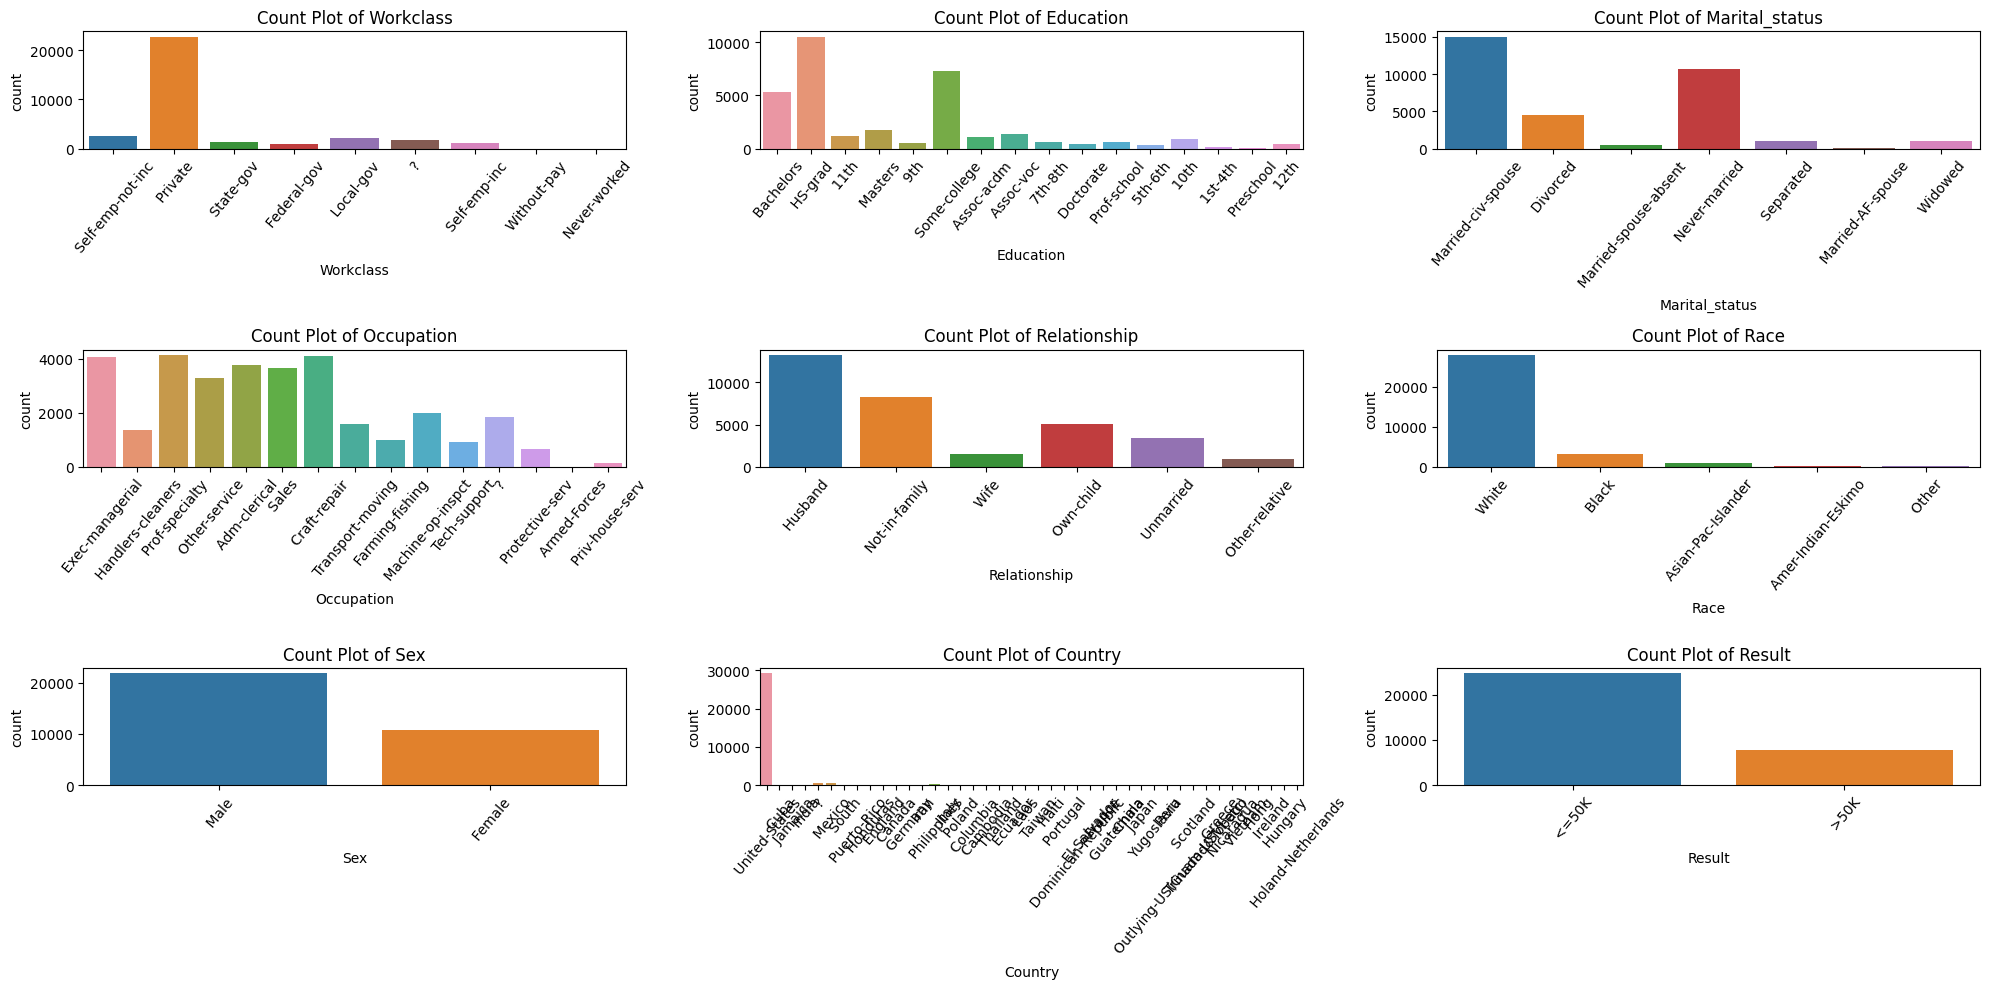

In [ ]:
n_row,n_cols=3,3
fig,axs = plt.subplots(n_row,n_cols,figsize=(20,10))
for idx,feat in enumerate(categorical.columns):
    if n_row > 1:
        ax = axs[(idx // n_cols),(idx % n_cols)]
    else :
        ax = axs[idx]

    sns.countplot(data=data,x=feat,ax=ax)
    ax.set_title(f"Count Plot of {feat}")
    labels = sorted(data[feat].value_counts().index)
    ax.tick_params(axis="x", rotation=50)
fig.tight_layout()

plt.show()

In [ ]:
data["Country"]= np.where(data["Country"].str.contains("United-States") , "United-States", "Others")
data["Country"].value_counts()

United-States    29169
Others            3391
Name: Country, dtype: int64

In [ ]:
data["Race"]= np.where(data["Race"].str.contains("White") , "Whites", "Others")
data["Race"].value_counts()

Whites    27815
Others     4745
Name: Race, dtype: int64

In [ ]:
data["Marital_status"]= np.where(data["Marital_status"].str.contains("Married-civ-spouse") , "Married-civ-spouse", "Others")
data["Marital_status"].value_counts()

Others                17584
Married-civ-spouse    14976
Name: Marital_status, dtype: int64

In [ ]:
data.loc[data["Workclass"].str.contains(" State-gov"),"Workclass"]= "Goverment"
data.loc[data["Workclass"].str.contains(" Federal-gov"),"Workclass"]="Goverment"
data.loc[data["Workclass"].str.contains(" Local-gov"),"Workclass"]="Goverment"
data.loc[data["Workclass"].str.contains(" Self-emp-inc"),"Workclass"]= "Others"
data.loc[data["Workclass"].str.contains(" Without-pay"),"Workclass"]="Others"
data.loc[data["Workclass"].str.contains(" Never-worked"),"Workclass"]="Others"
data.loc[data["Workclass"].str.contains(" Self-emp-not-inc"),"Workclass"]="Others"
data["Workclass"]=data["Workclass"].apply(lambda x:"Others" if " ?" in x else x)
data["Workclass"].unique()

array(['Others', ' Private', 'Goverment'], dtype=object)

In [ ]:
data.loc[data["Education"].str.contains(" Preschool"),"Education"]= "Basic"
data.loc[data["Education"].str.contains(" 1st-4th"),"Education"]="Basic"
data.loc[data["Education"].str.contains(" 5th-6th"),"Education"]="Basic"
data.loc[data["Education"].str.contains(" 7th-8th"),"Education"]= "Basic"
data.loc[data["Education"].str.contains(" 9th"),"Education"]="Basic"
data.loc[data["Education"].str.contains(" 10th"),"Education"]="Basic"
data.loc[data["Education"].str.contains(" 11th"),"Education"]="Basic"
data.loc[data["Education"].str.contains(" 12th"),"Education"]="Basic"
data.loc[data["Education"].str.contains(" HS-grad"),"Education"]="Intermidate"
data.loc[data["Education"].str.contains(" Some-college"),"Education"]="Tertiary"
data.loc[data["Education"].str.contains(" Doctorate"),"Education"]="Tertiary"
data.loc[data["Education"].str.contains(" Masters"),"Education"]="Tertiary"
data.loc[data["Education"].str.contains(" Bachelors"),"Education"]="Tertiary"
data.loc[data["Education"].str.contains(" Assoc-acdm"),"Education"]="Intermidate"
data.loc[data["Education"].str.contains(" Assoc-voc"),"Education"]="Intermidate"
data.loc[data["Education"].str.contains(" Prof-school"),"Education"]="Intermidate"
data["Education"].unique()

array(['Tertiary', 'Intermidate', 'Basic'], dtype=object)

In [ ]:
data.drop(columns=["Occupation","Relationship"],axis= 1, inplace= True)

In [ ]:
data["Result"].value_counts(normalize = True).mul(100)

 <=50K    75.918305
 >50K     24.081695
Name: Result, dtype: float64

Discretization was carried out on the numerical and categorical varaiables so as to remove outliers from the data, most of the complex features are now simplified and this process reduces overfitting

## Building the machine learning model

In [ ]:
Le = LabelEncoder()
data['Result'] = Le.fit_transform(data['Result'])


encoder = {}
encoder["Result"] = Le

In [ ]:
feature = ["Age",'Workclass',"Education",'Marital_status','Race', 'Sex',"Capital_gain","Capital_loss","Country"]
for feat in feature:
    Le = LabelEncoder()
    data[feat] = Le.fit_transform(data[feat])
    encoder[feat] = Le

In [ ]:
X = data.drop('Result', axis=1)
y = data['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)
print(y_pred[:10])

[0 0 0 0 0 0 1 0 0 0]


## Evaluating the performance of the model using 4 metrics

In [ ]:
y_test = encoder['Result'].inverse_transform(y_test)
y_pred = encoder['Result'].inverse_transform(y_pred)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7856265356265356

In [ ]:
precision = precision_score(y_test, y_pred, pos_label= ' <=50K' )
precision

0.8530422478269658

In [ ]:
f1 = f1_score(y_test, y_pred, pos_label=' <=50K')
f1

0.8580723871492476

In [ ]:
recall = recall_score(y_test, y_pred, pos_label= ' <=50K')
recall

0.8631622008590714

Random Forest Classifier produces highly accurate predictions as they combine multiple decsion trees and also allowing us to know which feature have the most impact on the model's prdiction.From the model performance Recall score metrics seems to be the best followed by f1 metrics. Their predictions are higher compared to Precision and Accuracy
